# Data processing


In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.spatial import cKDTree
import numpy as np

In [272]:

# Specify the path to your CSV files
weather_csv_path = "/Users/computer/Downloads/Load/Load/data/weather_data/*.csv"

# Get all CSV file paths
weather_csv_files = glob.glob(weather_csv_path)

# Read and combine all files into one DataFrame
weather_df = [pd.read_csv(file, parse_dates=['date_time_weather']) for file in weather_csv_files]

# Merge dataframes of all processed files
weather_df = pd.concat(weather_df, ignore_index=True)

# Display the combined DataFrame
print(weather_df)


         Unnamed: 0.1   date_time_weather  Unnamed: 0    id         name  \
0                   0 2021-01-01 00:00:00   2392917.0   2.0     Al Jafer   
1                   1 2021-01-01 00:05:00   2392918.0   2.0     Al Jafer   
2                   2 2021-01-01 00:10:00   2392919.0   2.0     Al Jafer   
3                   3 2021-01-01 00:15:00   2392920.0   2.0     Al Jafer   
4                   4 2021-01-01 00:20:00   2392921.0   2.0     Al Jafer   
...               ...                 ...         ...   ...          ...   
7220790       7220790 2023-12-31 23:35:00   8467900.0  29.0  Ras Muneeef   
7220791       7220791 2023-12-31 23:40:00   8467901.0  29.0  Ras Muneeef   
7220792       7220792 2023-12-31 23:45:00   8467902.0  29.0  Ras Muneeef   
7220793       7220793 2023-12-31 23:50:00   8467903.0  29.0  Ras Muneeef   
7220794       7220794 2023-12-31 23:55:00   8467904.0  29.0  Ras Muneeef   

               lon        lat     alt  wind_speed_knot  wind_direction_degree  \
0     

In [273]:

# Define the file path for the consumption data
consumption_file_path = "/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"



consumption_df = pd.read_excel(consumption_file_path)

# Read the consumption data from the Excel file and Drop empty columns
consumption_df = consumption_df.dropna(axis=1, how='all')
# Display the first few rows of the DataFrame to confirm it is loaded correctly
print("Consumption Data:")
print(consumption_df.head())


# Combine date and time into a single datetime column
consumption_df['date time'] = pd.to_datetime(consumption_df['date time'].astype(str).astype(str))

# Display the resulting DataFrame
print("Combined DateTime Data:")
print(consumption_df.head())



Consumption Data:
  Unnamed: 1           date time Unnamed: 3          Unnamed: 4   ABDOON_P  \
0 2022-12-22 2022-12-22 00:00:00          - 2022-12-22 00:15:00  68.764967   
1        NaT 2022-12-22 00:15:00          - 2022-12-22 00:30:00  66.653231   
2        NaT 2022-12-22 00:30:00          - 2022-12-22 00:45:00  64.597852   
3        NaT 2022-12-22 00:45:00          - 2022-12-22 01:00:00  62.472460   
4        NaT 2022-12-22 01:00:00          - 2022-12-22 01:15:00  60.585692   

   MW  ALHIZAM_P MW.1    ALSALT_P MW.2  ...  MW.45   ABDALI_P    AMMANS_P  \
0      74.628408       101.051490       ...         99.267082  142.179793   
1      71.736453        96.527432       ...         95.861026  135.385285   
2      69.361243        92.596907       ...         92.176326  130.173645   
3      67.281793        88.787623       ...         88.520570  124.715073   
4      64.917022        85.571806       ...         85.197838  120.251608   

  AQABA A2_P  AQABA_TH_P   BAYADER_P  GHORSAF_P   

In [274]:
consumption_df.head()

,Unnamed: 1,date time,Unnamed: 3,Unnamed: 4,ABDOON_P,MW,ALHIZAM_P,MW.1,ALSALT_P,MW.2,...,MW.45,ABDALI_P,AMMANS_P,AQABA A2_P,AQABA_TH_P,BAYADER_P,GHORSAF_P,MAAN_P,Q.A.I.A_P,ZERQA_P
0,2022-12-22,2022-12-22 00:00:00,-,2022-12-22 00:15:00,68.764967,,74.628408,,101.051490,,...,,99.267082,142.179793,28.967883,26.456249,123.863053,24.216399,40.743155,92.468205,78.861674
1,NaT,2022-12-22 00:15:00,-,2022-12-22 00:30:00,66.653231,,71.736453,,96.527432,,...,,95.861026,135.385285,28.404918,27.341207,119.592587,24.212756,39.842045,91.254029,76.320411
2,NaT,2022-12-22 00:30:00,-,2022-12-22 00:45:00,64.597852,,69.361243,,92.596907,,...,,92.176326,130.173645,27.793545,27.446248,114.806238,24.212756,38.863599,89.993602,72.937742
3,NaT,2022-12-22 00:45:00,-,2022-12-22 01:00:00,62.472460,,67.281793,,88.787623,,...,,88.520570,124.715073,26.255455,27.702298,110.032381,24.308198,37.422995,88.736829,70.732932
4,NaT,2022-12-22 01:00:00,-,2022-12-22 01:15:00,60.585692,,64.917022,,85.571806,,...,,85.197838,120.251608,26.229228,27.730119,106.152682,25.223323,36.267640,87.590058,68.765413


In [275]:
weather_df.head()

,Unnamed: 0.1,date_time_weather,Unnamed: 0,id,name,lon,lat,alt,wind_speed_knot,wind_direction_degree,irradiance,relative_humidity_percent,air_temperature_c,rainfall_mm,irradiance_corrected
0,0,2021-01-01 00:00:00,2392917.0,2.0,Al Jafer,36.135556,30.342222,865.0,3.037,2.366,0.0,86.4,4.9,0.0,0.0
1,1,2021-01-01 00:05:00,2392918.0,2.0,Al Jafer,36.135556,30.342222,865.0,2.207,2.368,0.0,86.8,5.0,0.0,0.0
2,2,2021-01-01 00:10:00,2392919.0,2.0,Al Jafer,36.135556,30.342222,865.0,3.571,2.373,0.0,87.2,4.9,0.0,0.0
3,3,2021-01-01 00:15:00,2392920.0,2.0,Al Jafer,36.135556,30.342222,865.0,3.848,2.371,0.0,87.7,4.9,0.0,0.0
4,4,2021-01-01 00:20:00,2392921.0,2.0,Al Jafer,36.135556,30.342222,865.0,3.719,2.365,0.0,87.8,4.6,0.0,0.0


## Verifying data types of all columns

In [277]:
print(consumption_df.dtypes)
print(weather_df.dtypes)

Unnamed: 1    datetime64[ns]
date time     datetime64[ns]
Unnamed: 3            object
Unnamed: 4    datetime64[ns]
ABDOON_P             float64
                   ...      
BAYADER_P            float64
GHORSAF_P            float64
MAAN_P               float64
Q.A.I.A_P            float64
ZERQA_P              float64
Length: 103, dtype: object
Unnamed: 0.1                          int64
date_time_weather            datetime64[ns]
Unnamed: 0                          float64
id                                  float64
name                                 object
lon                                 float64
lat                                 float64
alt                                 float64
wind_speed_knot                     float64
wind_direction_degree               float64
irradiance                          float64
relative_humidity_percent           float64
air_temperature_c                   float64
rainfall_mm                         float64
irradiance_corrected                fl

In [278]:
# Select all columns except 'id'
nan_per_w_station = weather_df.groupby('id').apply(lambda group: group.loc[:, group.columns != 'id'].isna().sum() / len(group))
nan_per_w_station 

/var/folders/np/t7_6mjq16kn5ymsvjbw3kjd40000gn/T/ipykernel_4849/2398438414.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_per_w_station = weather_df.groupby('id').apply(lambda group: group.loc[:, group.columns != 'id'].isna().sum() / len(group))


,Unnamed: 0.1,date_time_weather,Unnamed: 0,name,lon,lat,alt,wind_speed_knot,wind_direction_degree,irradiance,relative_humidity_percent,air_temperature_c,rainfall_mm,irradiance_corrected
id,,,,,,,,,,,,,,
2.0,0.0,0.0,0.673423,0.0,0.0,0.0,0.0,0.691931,0.691931,0.691931,0.691931,0.691931,0.691931,0.000038
3.0,0.0,0.0,0.286194,0.0,0.0,0.0,0.0,0.286194,0.286194,0.286194,0.286194,0.286194,0.286194,0.000000
4.0,0.0,0.0,0.021585,0.0,0.0,0.0,0.0,0.021585,0.021585,0.021585,0.021585,0.021921,0.021585,0.000000
5.0,0.0,0.0,0.010762,0.0,0.0,0.0,0.0,0.010762,0.010762,0.010762,0.010762,0.010762,0.010762,0.000000
7.0,0.0,0.0,0.024013,0.0,0.0,0.0,0.0,0.024013,0.024013,0.024013,0.024013,0.024013,0.024013,0.000000
8.0,0.0,0.0,0.160017,0.0,0.0,0.0,0.0,0.160017,0.160017,0.160017,0.160017,0.160017,0.160017,0.000000
9.0,0.0,0.0,0.074619,0.0,0.0,0.0,0.0,0.076719,0.076719,0.077432,0.076719,0.077372,0.076719,0.000000
11.0,0.0,0.0,0.084465,0.0,0.0,0.0,0.0,0.084465,0.084465,0.084465,0.084465,0.084465,0.084465,0.000000
12.0,0.0,0.0,0.012335,0.0,0.0,0.0,0.0,0.012335,0.012335,0.012338,0.012335,0.012338,0.012335,0.000000


## Selecting weather rich columns as features

In [280]:
# Filter out unnecessary weather features while keeping identifiers
weather_features = [
    # identifiers
    'id',
    'name',
    # features
    'lon',
    'lat',
    'alt',
    'date_time_weather',
    'wind_speed_knot',
    'wind_direction_degree',
    'irradiance',
    'relative_humidity_percent',
    'air_temperature_c',
    'rainfall_mm',
]

weather_df = weather_df[weather_features]
weather_df.head()

,id,name,lon,lat,alt,date_time_weather,wind_speed_knot,wind_direction_degree,irradiance,relative_humidity_percent,air_temperature_c,rainfall_mm
0,2.0,Al Jafer,36.135556,30.342222,865.0,2021-01-01 00:00:00,3.037,2.366,0.0,86.4,4.9,0.0
1,2.0,Al Jafer,36.135556,30.342222,865.0,2021-01-01 00:05:00,2.207,2.368,0.0,86.8,5.0,0.0
2,2.0,Al Jafer,36.135556,30.342222,865.0,2021-01-01 00:10:00,3.571,2.373,0.0,87.2,4.9,0.0
3,2.0,Al Jafer,36.135556,30.342222,865.0,2021-01-01 00:15:00,3.848,2.371,0.0,87.7,4.9,0.0
4,2.0,Al Jafer,36.135556,30.342222,865.0,2021-01-01 00:20:00,3.719,2.365,0.0,87.8,4.6,0.0


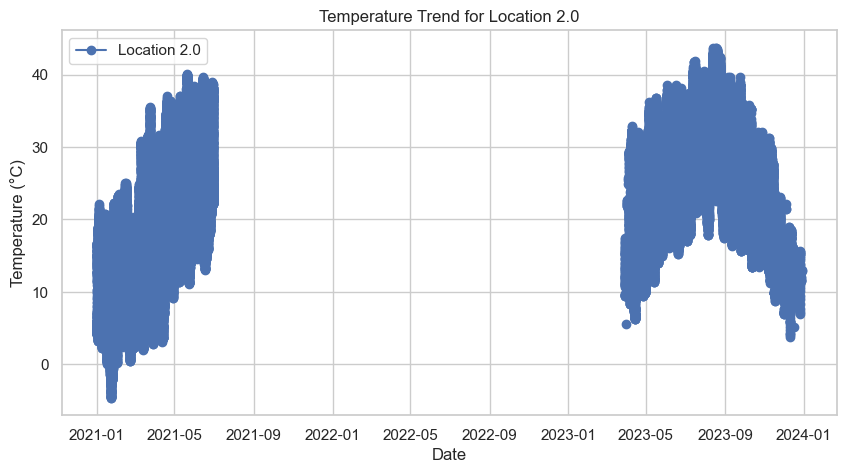

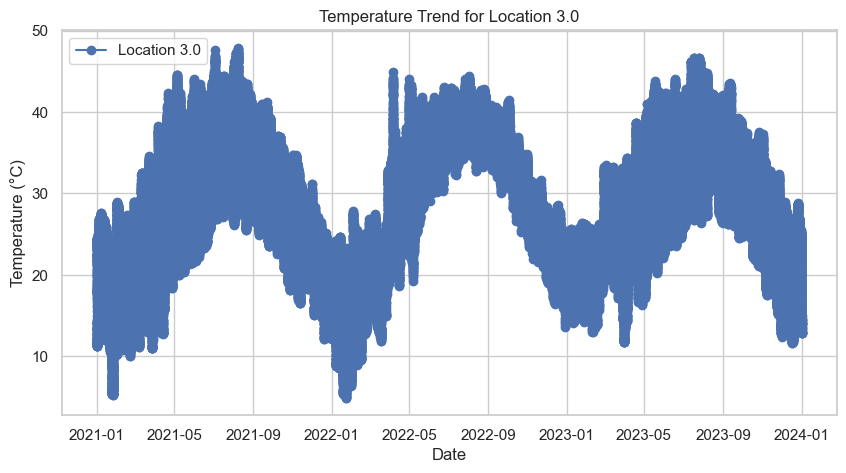

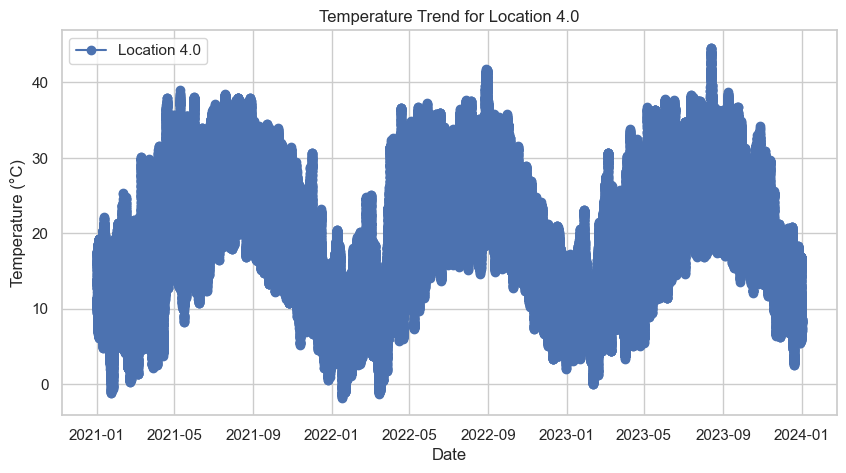

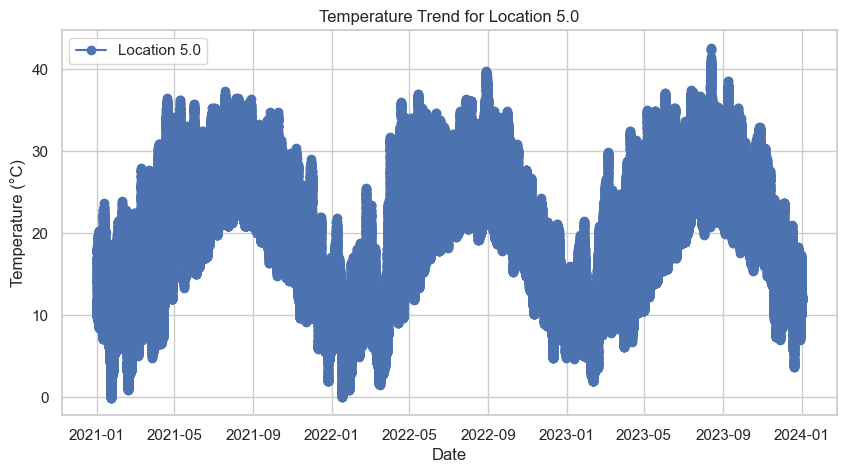

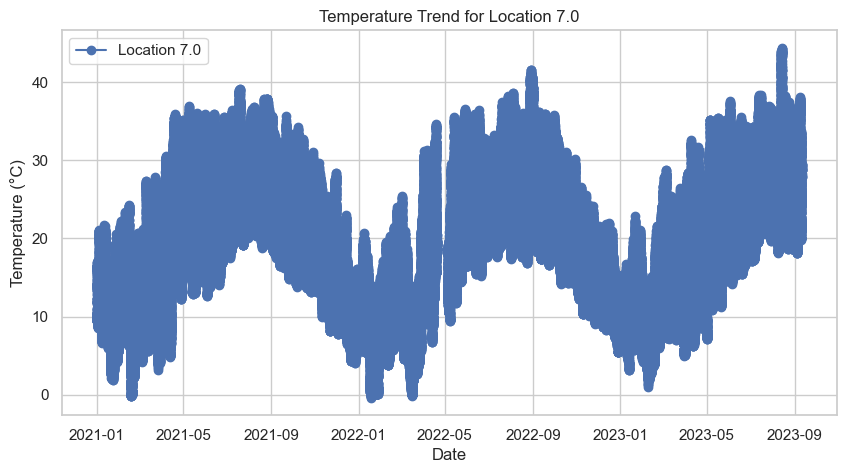

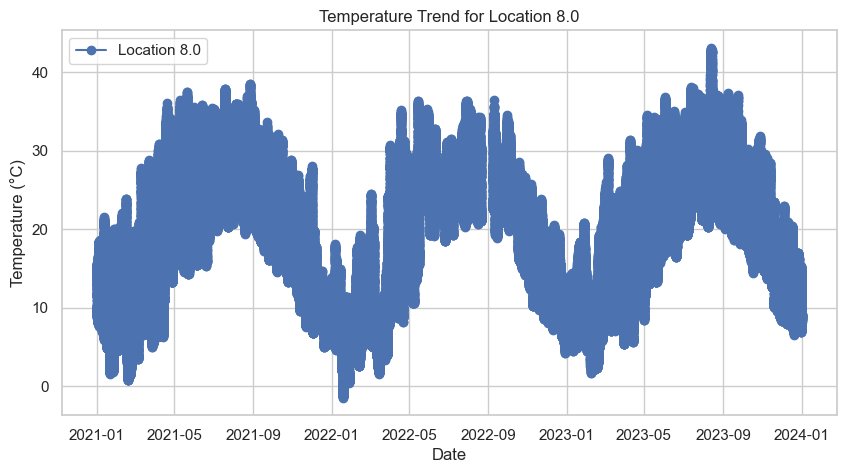

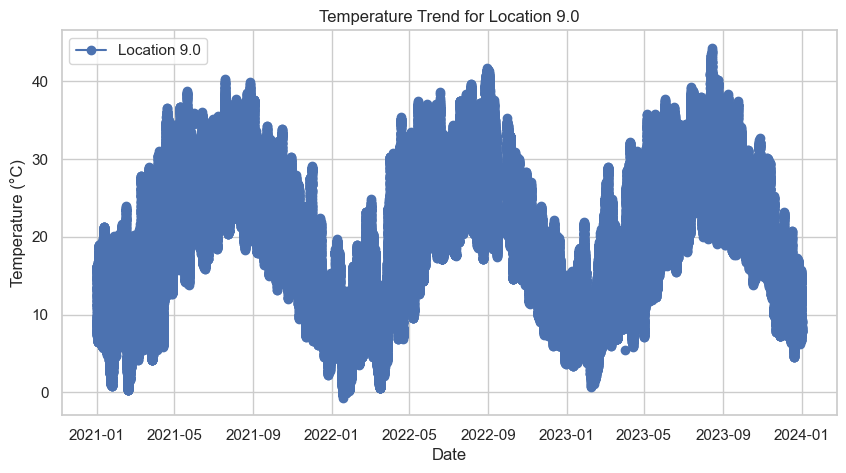

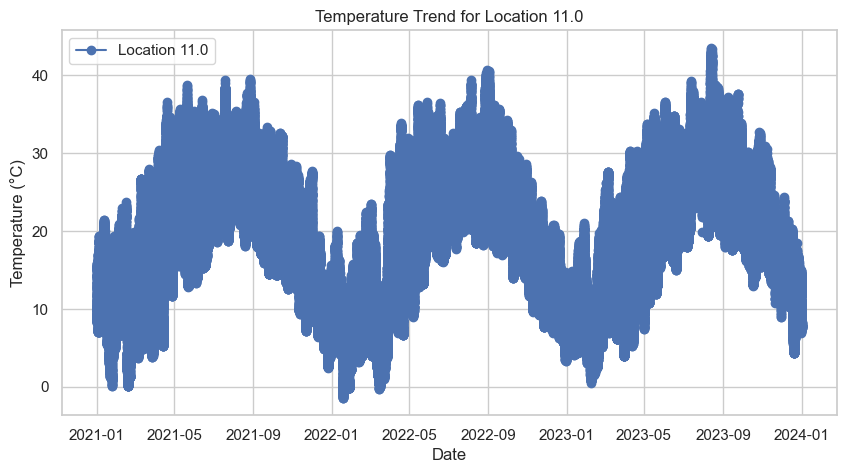

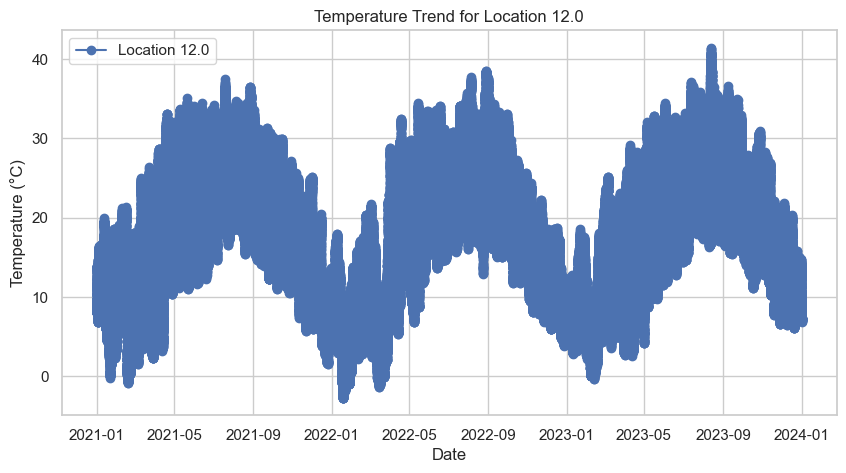

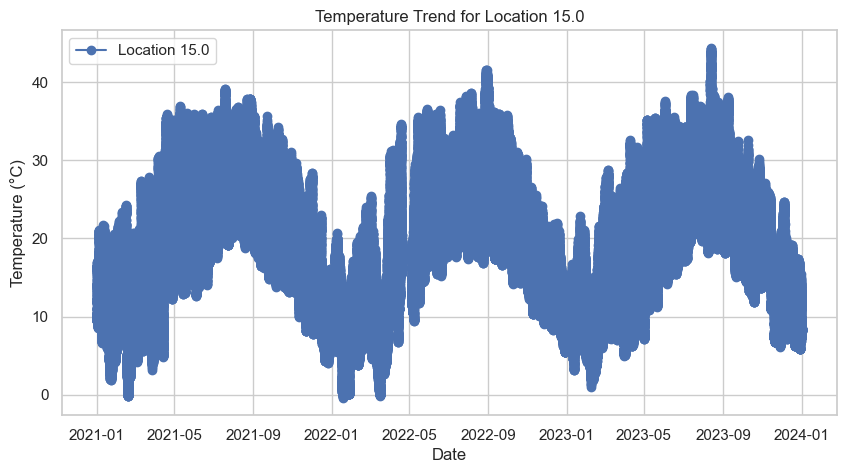

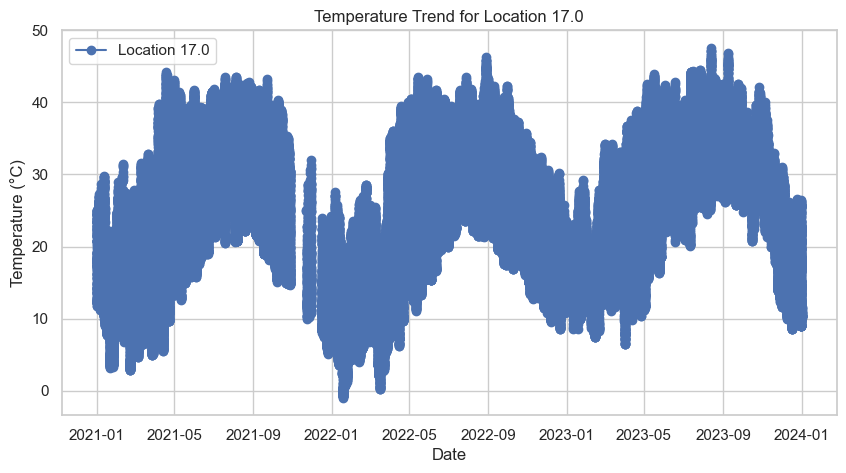

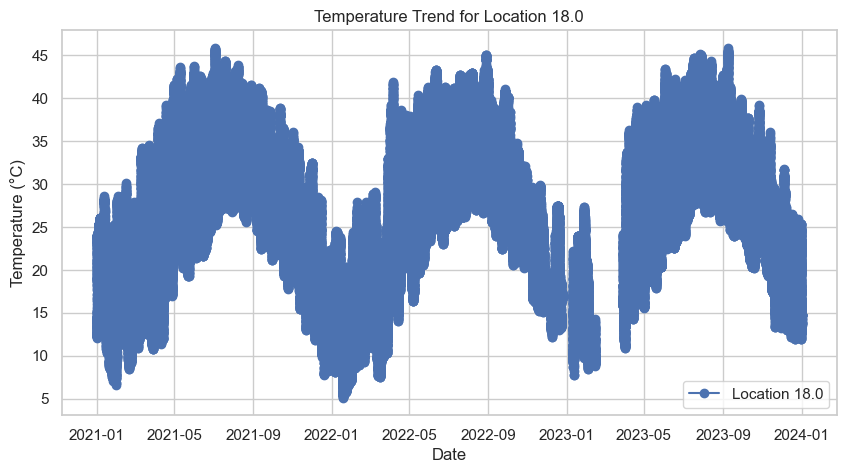

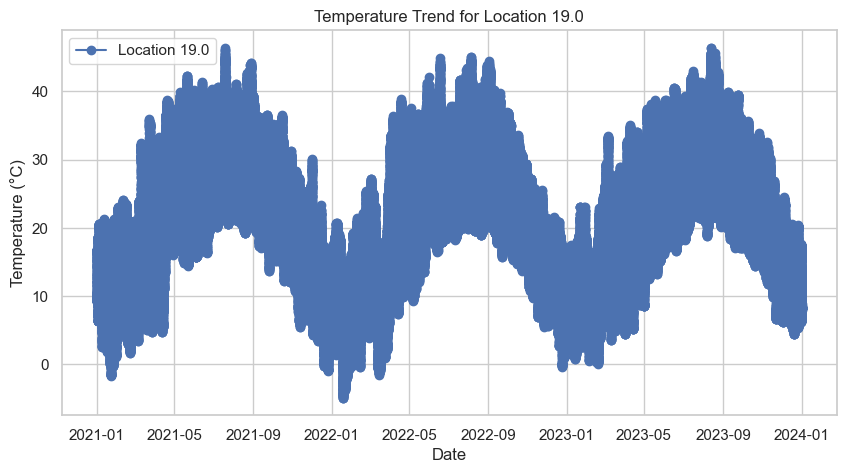

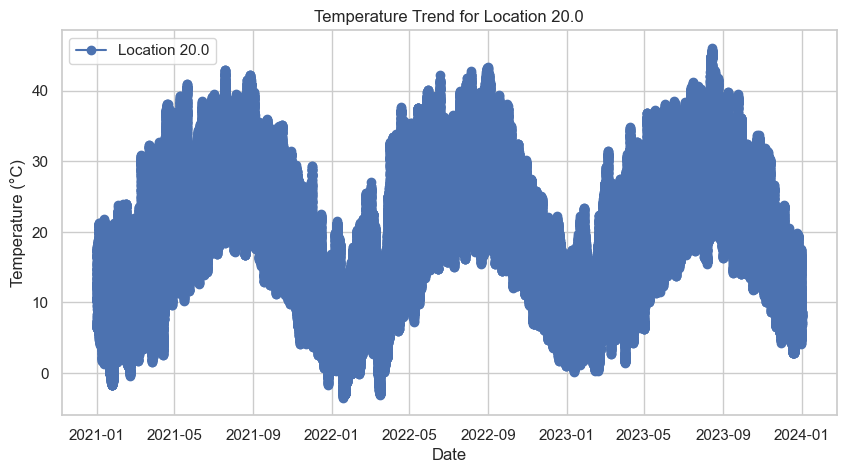

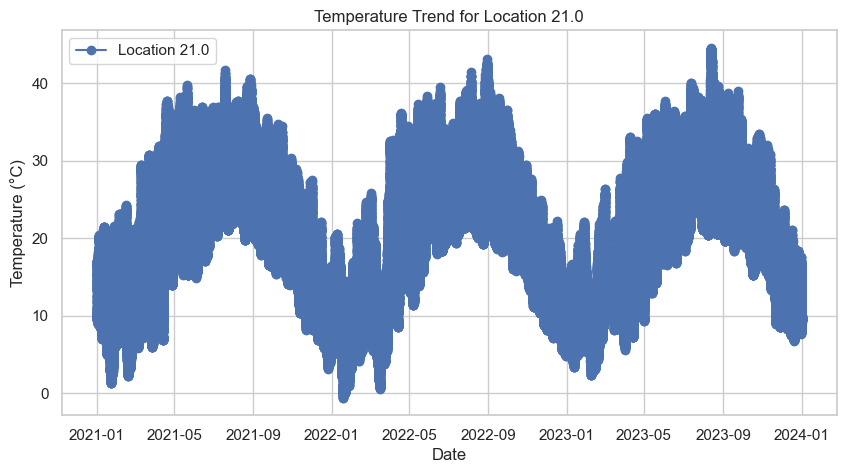

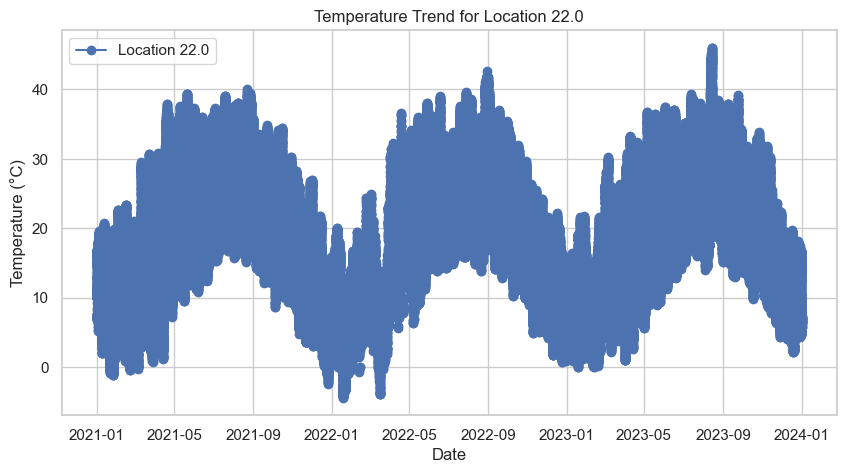

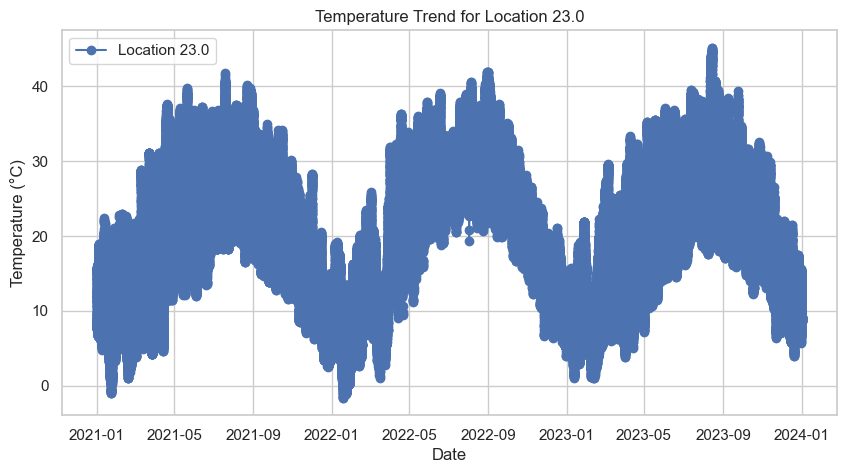

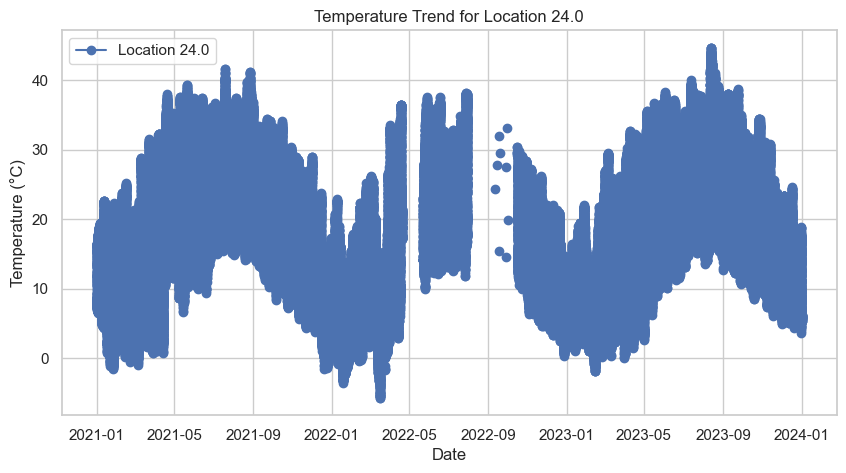

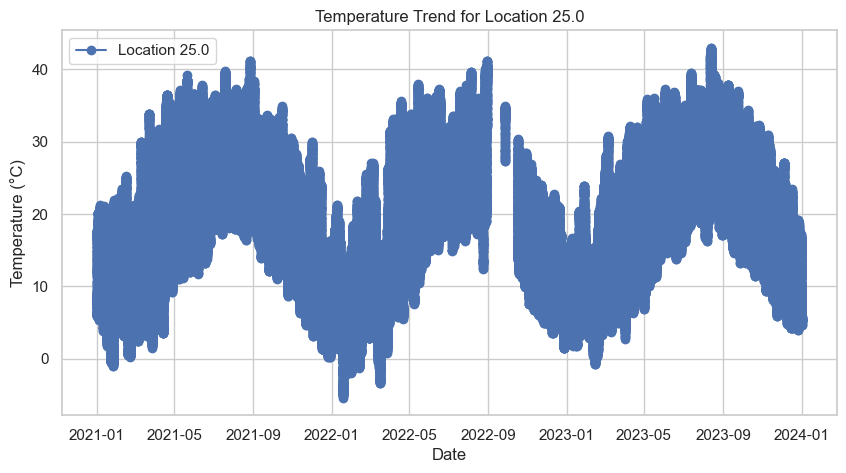

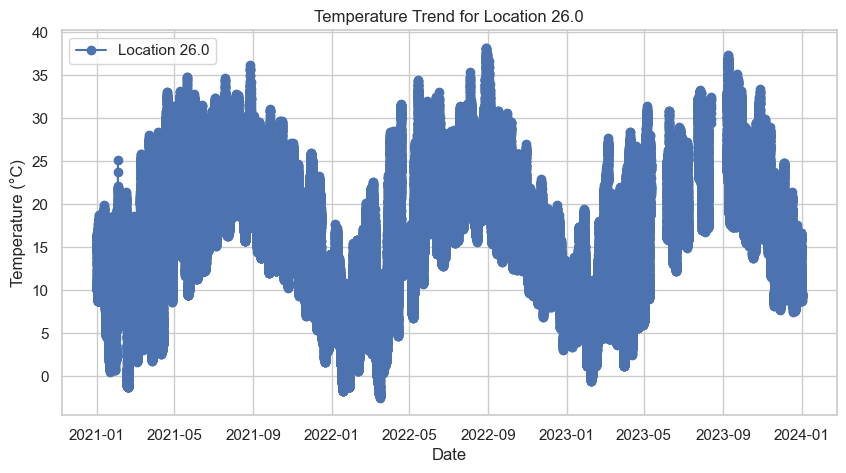

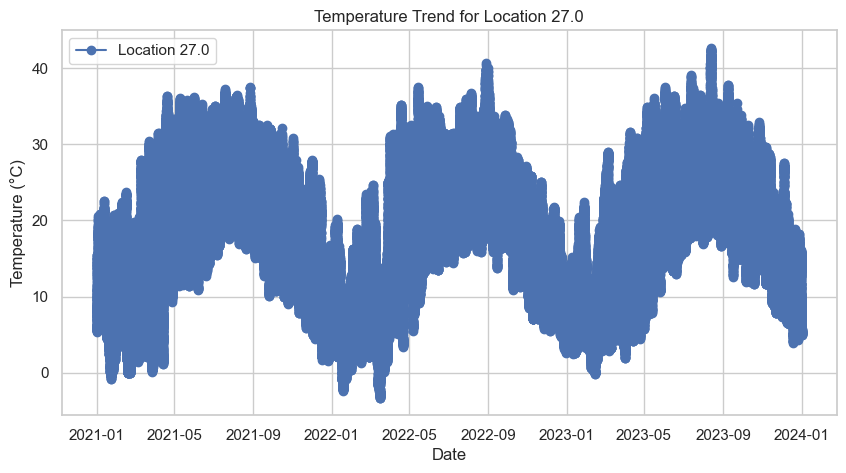

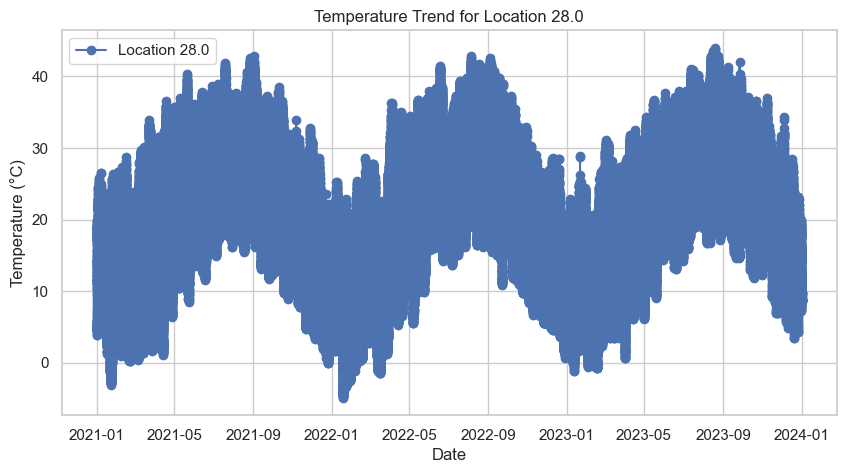

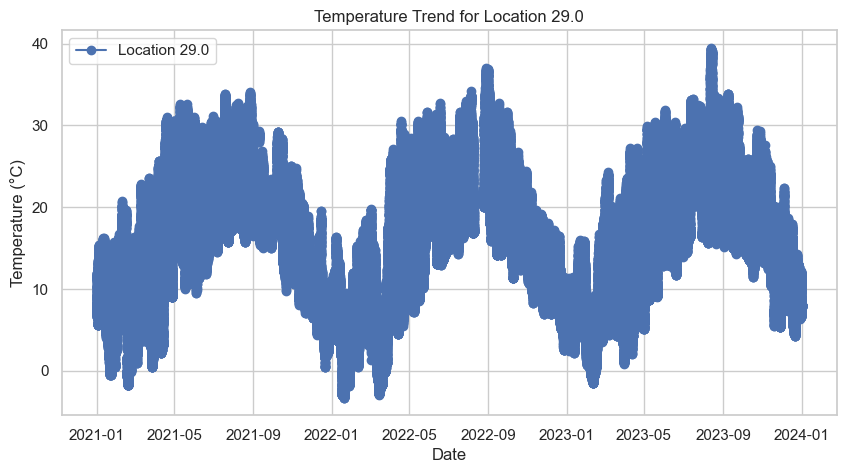

In [281]:
import matplotlib.pyplot as plt

# Group the weather data by 'id'
weather_grouped = weather_df.groupby('id')

# Loop through each group and plot the temperature trend
for id, group in weather_grouped:
    plt.figure(figsize=(10, 5))
    plt.plot(group['date_time_weather'], group['air_temperature_c'], marker='o', label=f'Location {id}')
    plt.title(f'Temperature Trend for Location {id}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()

# To focus on a specific location, uncomment and set the desired location_id
# location_id = 2  # Change this to the desired location ID
# loc_df = weather_df[weather_df['id'] == location_id]
# plt.figure(figsize=(10, 5))
# plt.plot(loc_df['date_time'], loc_df['air_temperature_c'], label=f'Location {location_id}')
# plt.title(f'Temperature Trend for Location {location_id}')
# plt.xlabel('Date')
# plt.ylabel('Temperature (°C)')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()



## Finding nearest weather station to power station by coords

In [283]:
# Drop columns with 2 or 3 unique values
columns_to_drop = [col for col in consumption_df.columns if consumption_df[col].nunique() <= 3]
consumption_df = consumption_df.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns after dropping columns with 2 or 3 unique values:")
print(consumption_df.columns)

Remaining columns after dropping columns with 2 or 3 unique values:
Index(['Unnamed: 1', 'date time', 'Unnamed: 4', 'ABDOON_P', 'ALHIZAM_P',
       'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P', 'ATTARATX_P', 'AZRAQ_P',
       'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P', 'DISI_P', 'EL_HASA_P',
       'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P', 'IRBID_N P', 'ISHTAFIN P',
       'KARAK P', 'MADABA_S P', 'MAFRAQ_P', 'MANARAH_P', 'MARQA_P',
       'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P', 'N_KARAK P', 'QATRANA P',
       'QUWEIRA P', 'Q_CEMENT P', 'RAJIHI P', 'RAMA P', 'RASHADI_P', 'REHAB P',
       'RESHA_N P', 'REWESHED P', 'SABHA P', 'SAFAWI P', 'SAHAB P', 'SHEDIA_P',
       'SUBEIHI P', 'SWEIMEH P', 'TAFILA_C P', 'TAREQ P', 'UNIVRSTY P',
       'WAQAS P', 'ABDALI_P', 'AMMANS_P', 'AQABA A2_P', 'AQABA_TH_P',
       'BAYADER_P', 'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'],
      dtype='object')


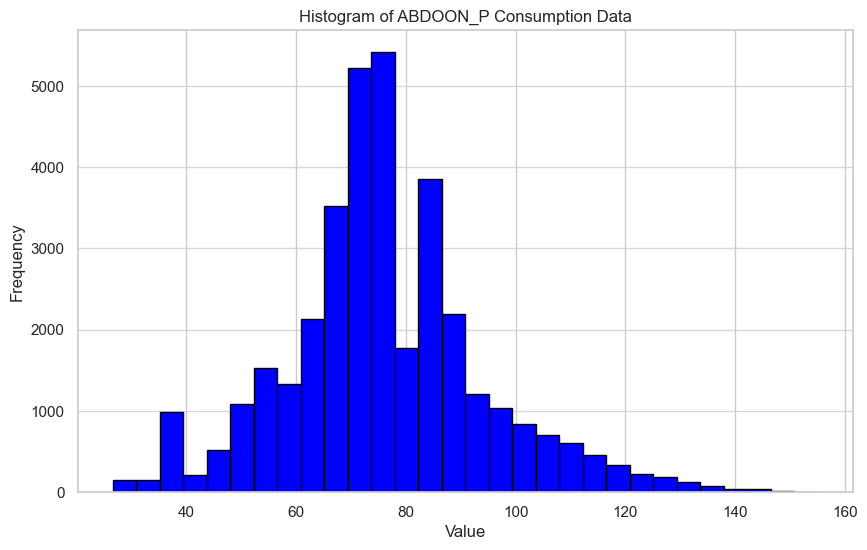

In [284]:

import matplotlib.pyplot as plt


# Plotting a histogram for a specific numeric column (replace 'your_numeric_column' with the actual column name)
plt.figure(figsize=(10, 6))
plt.hist(consumption_df['ABDOON_P'], bins=30, color='blue', edgecolor='black')  # Change 'your_numeric_column' to the actual column name
plt.title('Histogram of ABDOON_P Consumption Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


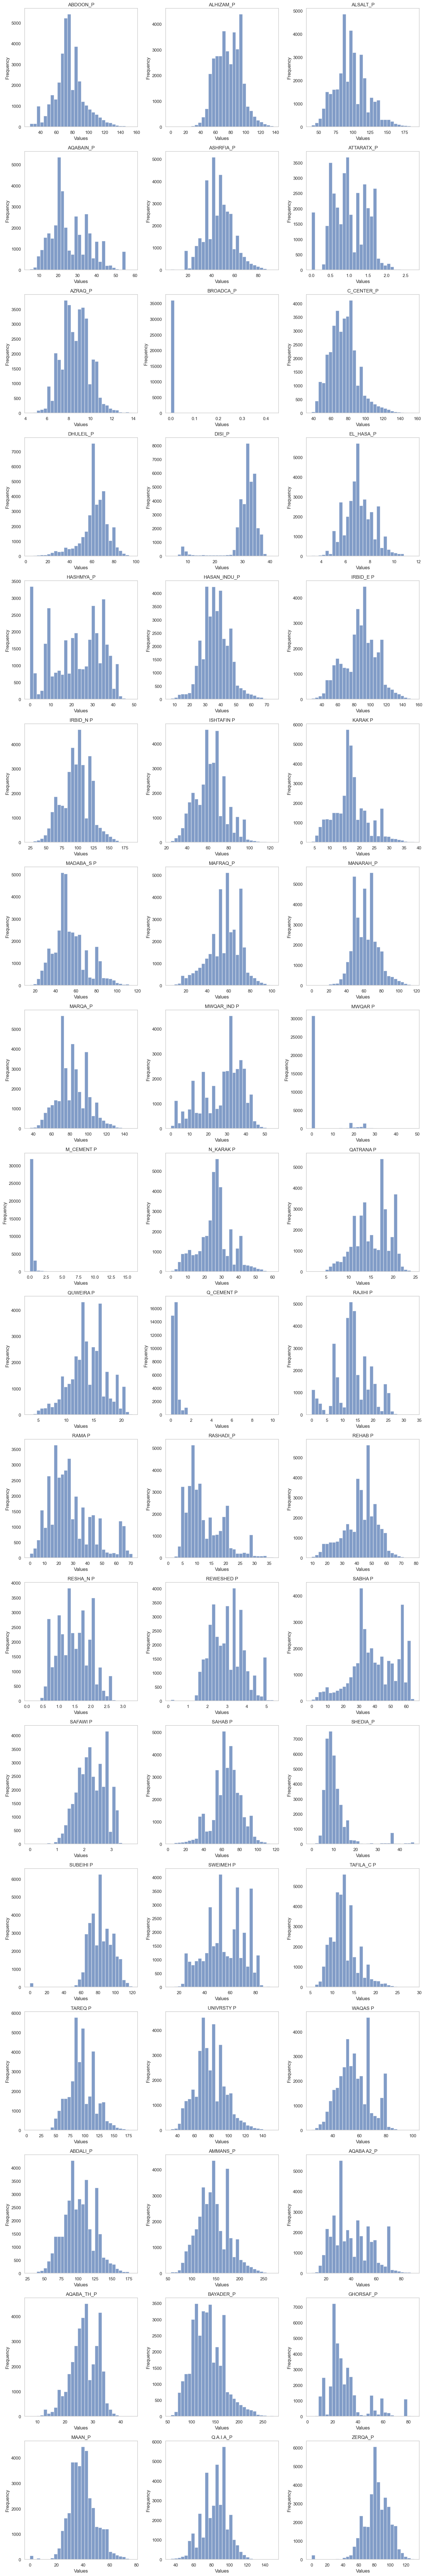

In [285]:
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualizations

# Define the file path for the consumption data
consumption_file_path ="/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"

# Read the consumption data from the Excel file into a DataFrame
consumption_df = pd.read_excel(consumption_file_path)

# Drop any columns that are completely empty (i.e., all values are NaN)
consumption_df = consumption_df.dropna(axis=1, how='all')

# List of columns to create histograms for
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'N_KARAK P', 'QATRANA P', 'QUWEIRA P', 'Q_CEMENT P', 'RAJIHI P',
    'RAMA P', 'RASHADI_P', 'REHAB P', 'RESHA_N P', 'REWESHED P',
    'SABHA P', 'SAFAWI P', 'SAHAB P', 'SHEDIA_P', 'SUBEIHI P',
    'SWEIMEH P', 'TAFILA_C P', 'TAREQ P', 'UNIVRSTY P', 'WAQAS P',
    'ABDALI_P', 'AMMANS_P', 'AQABA A2_P', 'AQABA_TH_P', 'BAYADER_P',
    'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Set the number of rows and columns for subplots
n_cols = 3  # Number of columns for the subplot
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot histograms for each specified column in separate subplots
for i, column in enumerate(columns_to_plot):
    if column in consumption_df.columns:  # Check if the column exists in DataFrame
        axes[i].hist(consumption_df[column], bins=30, alpha=0.7)
        axes[i].set_title(column)
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
        axes[i].grid()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

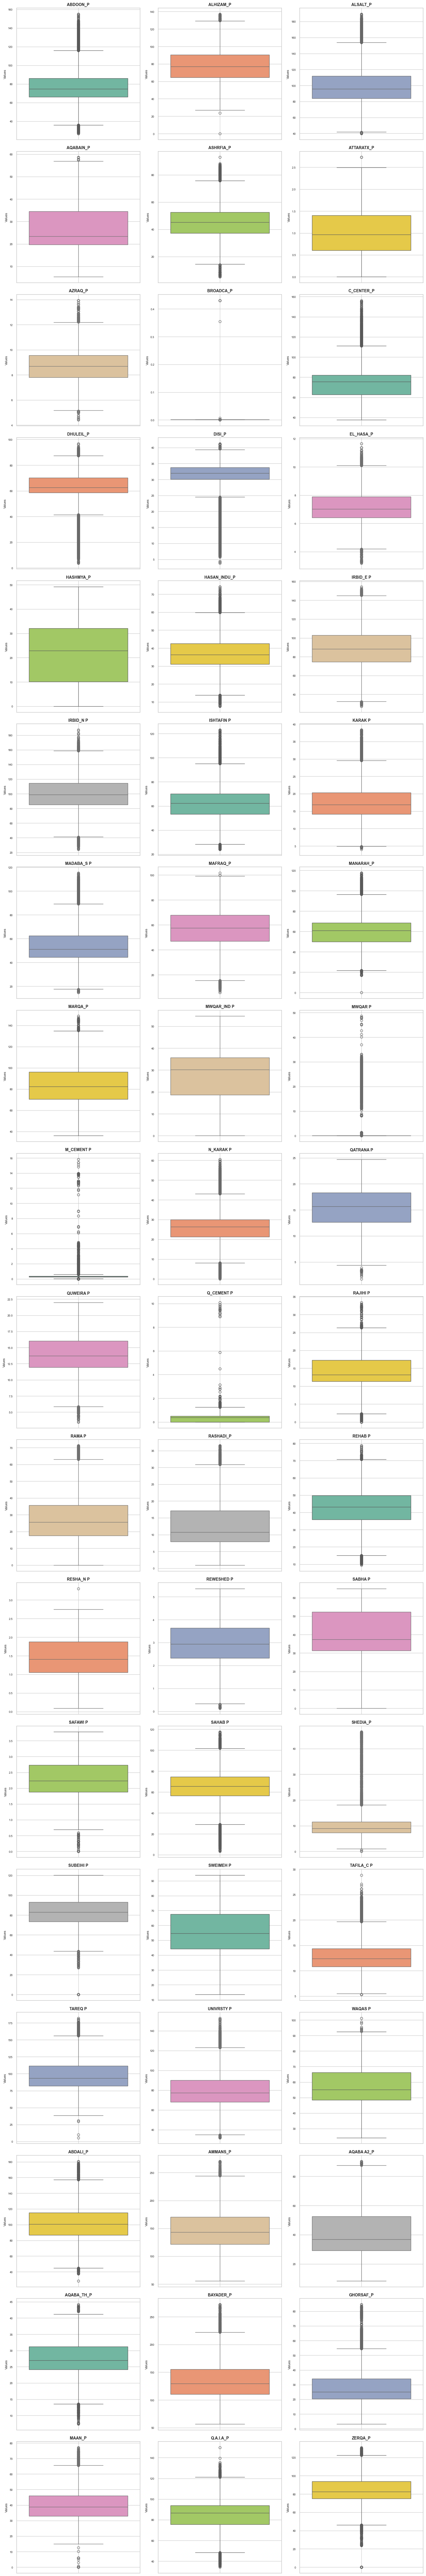

In [286]:
import seaborn as sns

# Define the file path for the consumption data
consumption_file_path = "/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"

# Read the consumption data from the Excel file
consumption_df = pd.read_excel(consumption_file_path)

# Drop empty columns
consumption_df = consumption_df.dropna(axis=1, how='all')

# List of columns to create box plots for
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'N_KARAK P', 'QATRANA P', 'QUWEIRA P', 'Q_CEMENT P', 'RAJIHI P',
    'RAMA P', 'RASHADI_P', 'REHAB P', 'RESHA_N P', 'REWESHED P',
    'SABHA P', 'SAFAWI P', 'SAHAB P', 'SHEDIA_P', 'SUBEIHI P',
    'SWEIMEH P', 'TAFILA_C P', 'TAREQ P', 'UNIVRSTY P', 'WAQAS P',
    'ABDALI_P', 'AMMANS_P', 'AQABA A2_P', 'AQABA_TH_P', 'BAYADER_P',
    'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Set the number of rows and columns for subplots
n_cols = 3  # Number of columns for the subplot
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a more refined plot style using seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Define a color palette for the boxplots
palette = sns.color_palette("Set2", n_colors=len(columns_to_plot))

# Plot box plots for each specified column in separate subplots
for i, column in enumerate(columns_to_plot):
    if column in consumption_df.columns:  # Check if the column exists in DataFrame
        sns.boxplot(data=consumption_df[column], ax=axes[i], color=palette[i])
        axes[i].set_title(column, fontsize=10, weight='bold')
        axes[i].set_ylabel('Values', fontsize=8)
        axes[i].tick_params(axis='x', labelsize=7)
        axes[i].tick_params(axis='y', labelsize=7)
        axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and improve aesthetics
plt.tight_layout()
plt.show()


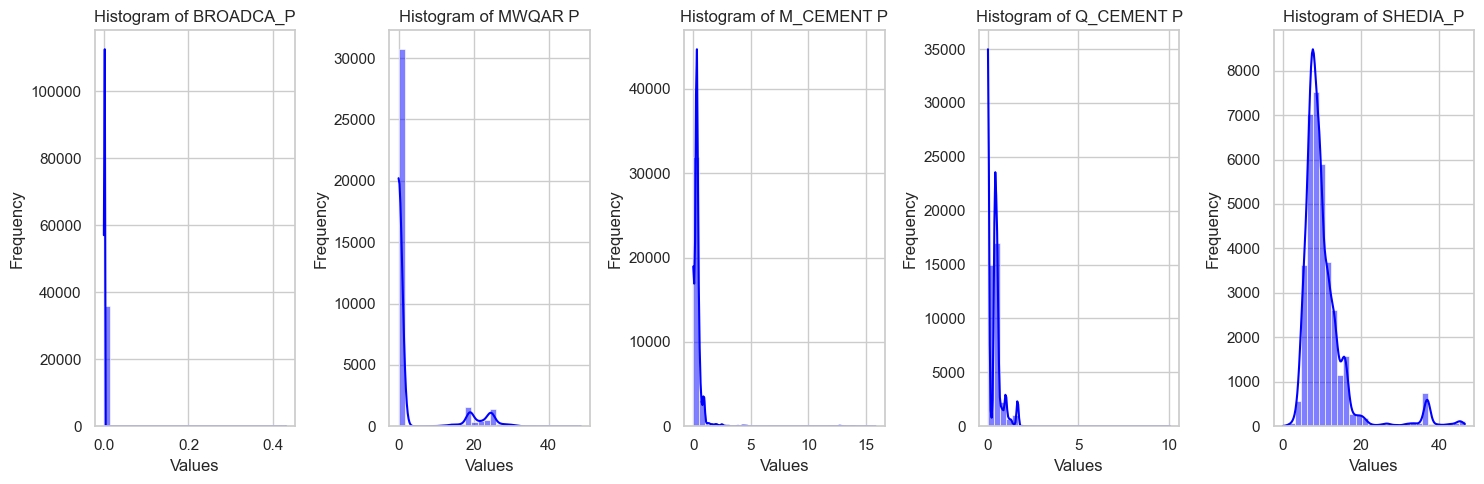

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the columns to analyze
columns_to_analyze = ['BROADCA_P', 'MWQAR P', 'M_CEMENT P', 'Q_CEMENT P','SHEDIA_P']

# Create histograms plots to analyze some columns with problems
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_analyze):
    plt.subplot(1, 5, i + 1)
    sns.histplot(consumption_df[column], kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()



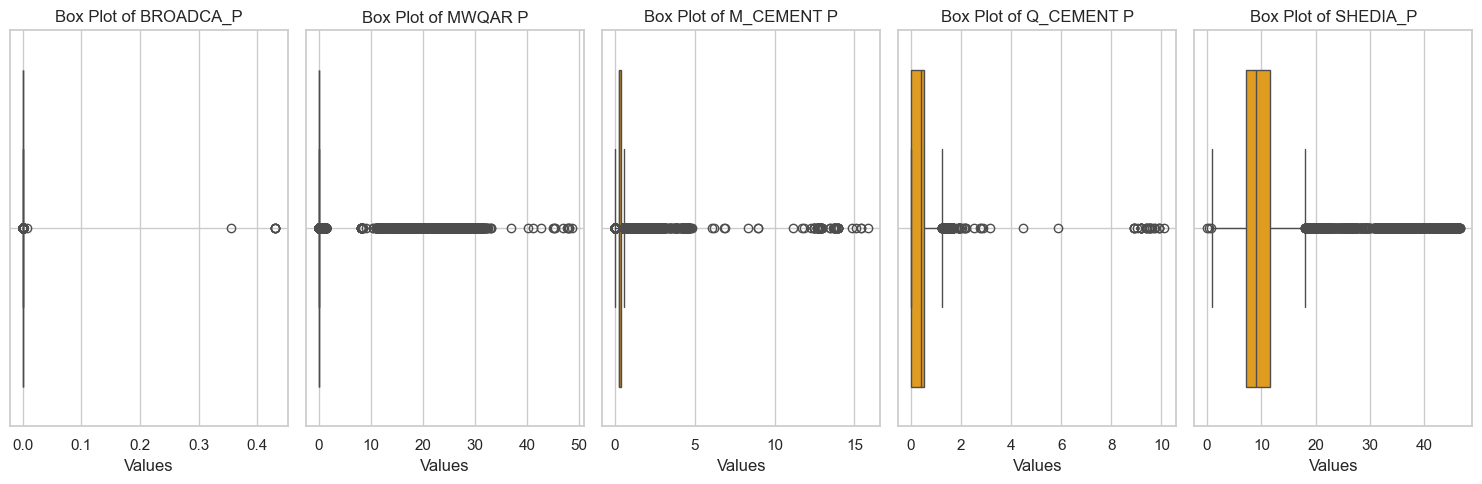

In [288]:
# Create box plots to analyze some columns with problems
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_analyze):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x=consumption_df[column], color='orange')
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()


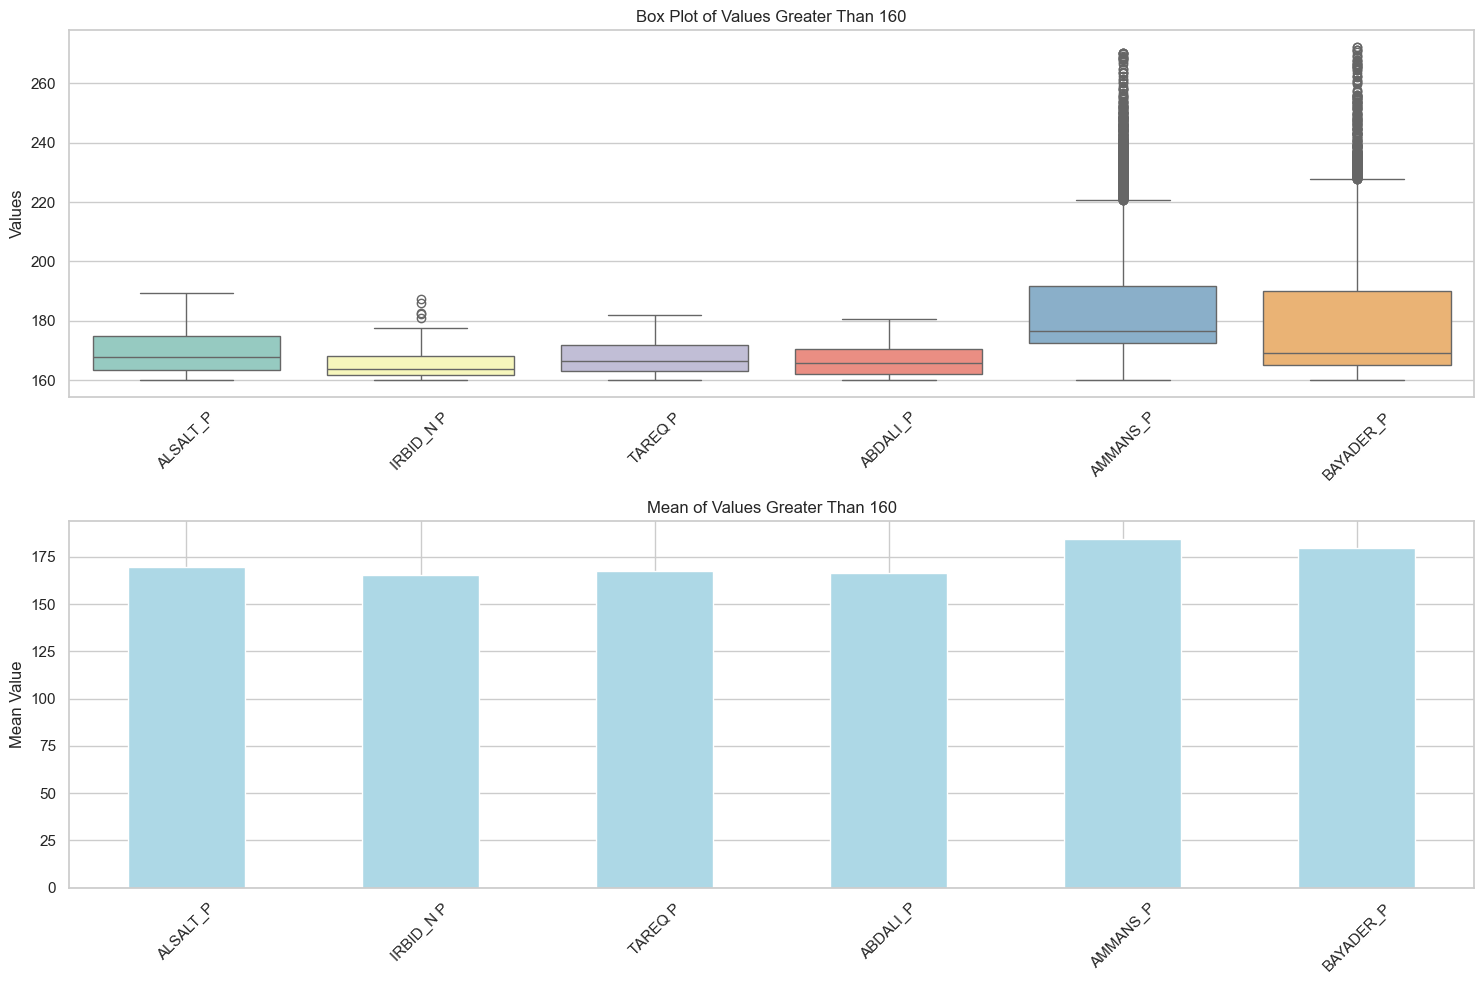

In [289]:
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualizations

# Define the file path for the consumption data
consumption_file_path = "/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"

# Read the consumption data from the Excel file into a DataFrame
consumption_df = pd.read_excel(consumption_file_path)

# Drop any columns that are completely empty (i.e., all values are NaN)
consumption_df = consumption_df.dropna(axis=1, how='all')

# Define the columns to analyze
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'N_KARAK P', 'QATRANA P', 'QUWEIRA P', 'Q_CEMENT P', 'RAJIHI P',
    'RAMA P', 'RASHADI_P', 'REHAB P', 'RESHA_N P', 'REWESHED P',
    'SABHA P', 'SAFAWI P', 'SAHAB P', 'SHEDIA_P', 'SUBEIHI P',
    'SWEIMEH P', 'TAFILA_C P', 'TAREQ P', 'UNIVRSTY P', 'WAQAS P',
    'ABDALI_P', 'AMMANS_P', 'AQABA A2_P', 'AQABA_TH_P', 'BAYADER_P',
    'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Filter the DataFrame to keep only those columns with values greater than 120
filtered_df = consumption_df[columns_to_plot].where(consumption_df[columns_to_plot] > 160)

# Drop columns that have all NaN values after filtering
filtered_df = filtered_df.dropna(axis=1, how='all')

# Create a figure for the plots, setting the overall size
plt.figure(figsize=(15, 10))

# Create a box plot for all filtered columns in the first subplot
plt.subplot(2, 1, 1)  # Create a subplot with 2 rows and 1 column, focus on the first one
sns.boxplot(data=filtered_df, palette="Set3")  # Draw a box plot with a color palette
plt.title('Box Plot of Values Greater Than 160')  # Title for the box plot
plt.ylabel('Values')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Calculate the mean values for the filtered DataFrame
mean_values = filtered_df.mean()

# Create a bar plot for the mean values of the filtered columns in the second subplot
plt.subplot(2, 1, 2)  # Focus on the second subplot
mean_values.plot(kind='bar', color='lightblue')  # Draw a bar plot for mean values with a specified color
plt.title('Mean of Values Greater Than 160')  # Title for the bar plot
plt.ylabel('Mean Value')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap and improve appearance
plt.tight_layout()

# Display the plots
plt.show()

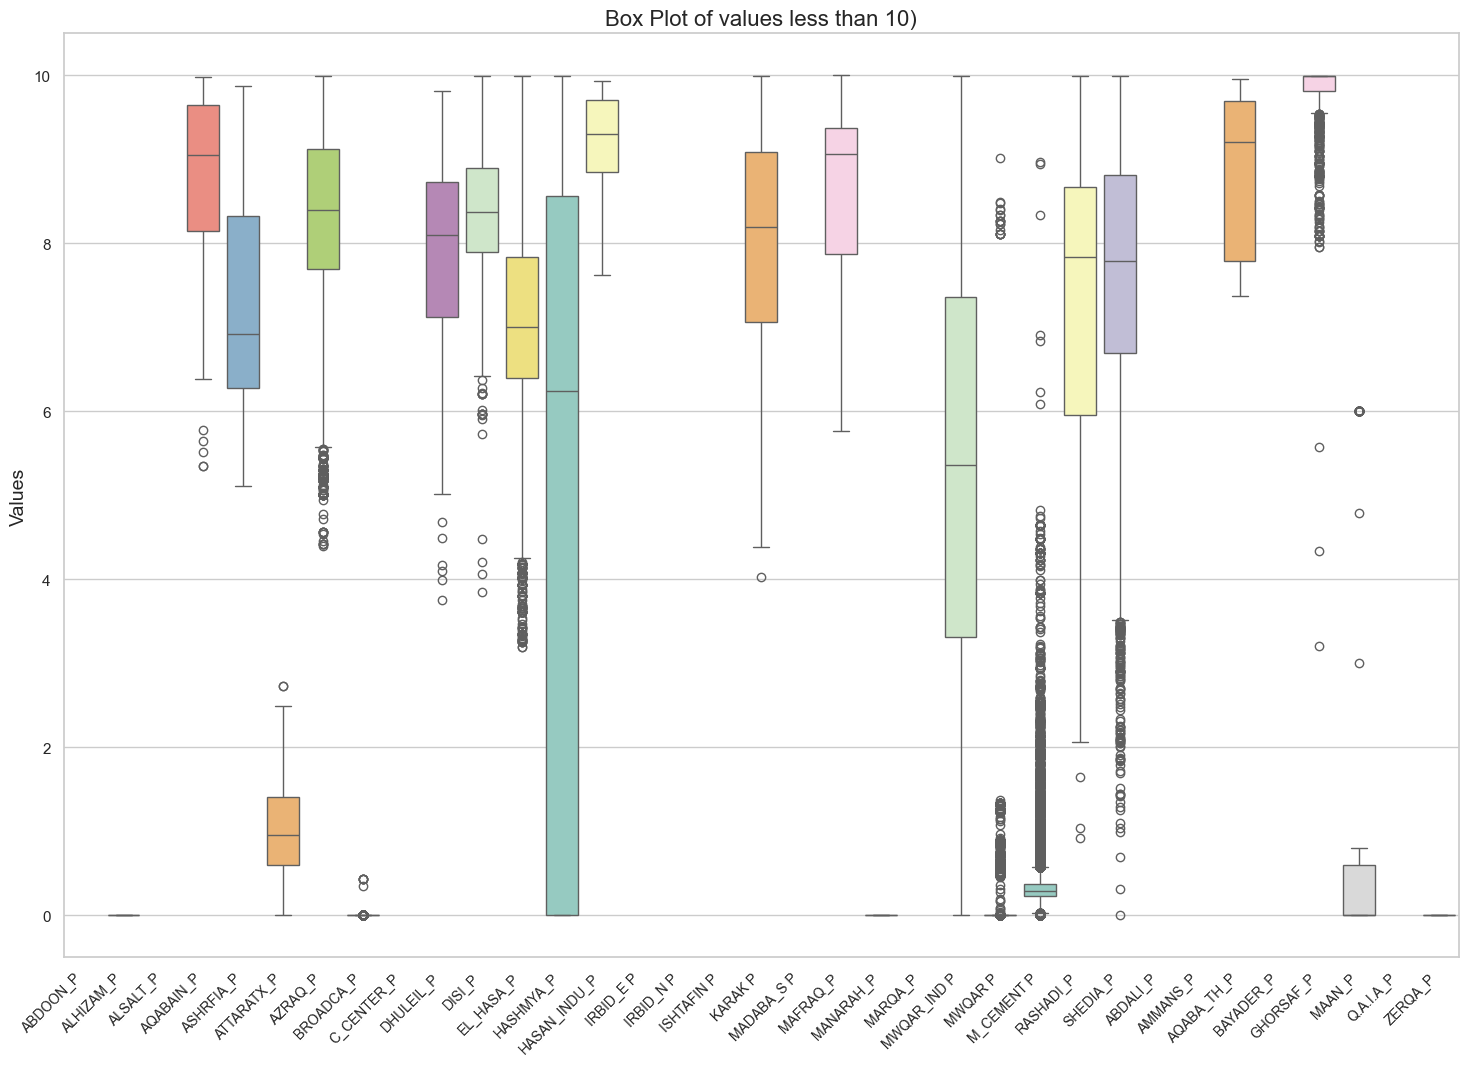

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path for the consumption data
consumption_file_path ="/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"

# Read the consumption data from the Excel file into a DataFrame
consumption_df = pd.read_excel(consumption_file_path)

# Drop any columns that are completely empty
consumption_df = consumption_df.dropna(axis=1, how='all')


# Define the columns to analyze
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'RASHADI_P', 'SHEDIA_P', 'ABDALI_P', 'AMMANS_P', 'AQABA_TH_P',
    'BAYADER_P', 'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Filter the DataFrame to keep only those columns that exist
existing_columns = [col for col in columns_to_plot if col in consumption_df.columns]

# Create a new DataFrame to hold values between 0 and 10
filtered_df = consumption_df[existing_columns].copy()

# Keep only values that are between 0 and 10 (inclusive)
filtered_df = filtered_df[(filtered_df >= 0) & (filtered_df <= 10)]

# Create a figure for the box plot
plt.figure(figsize=(18, 12))  # Increase figure size

# Create a box plot for all existing columns
sns.boxplot(data=filtered_df, palette="Set3")

# Title and labels
plt.title('Box Plot of values less than 10)', fontsize=16)
plt.ylabel('Values', fontsize=14)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.show()


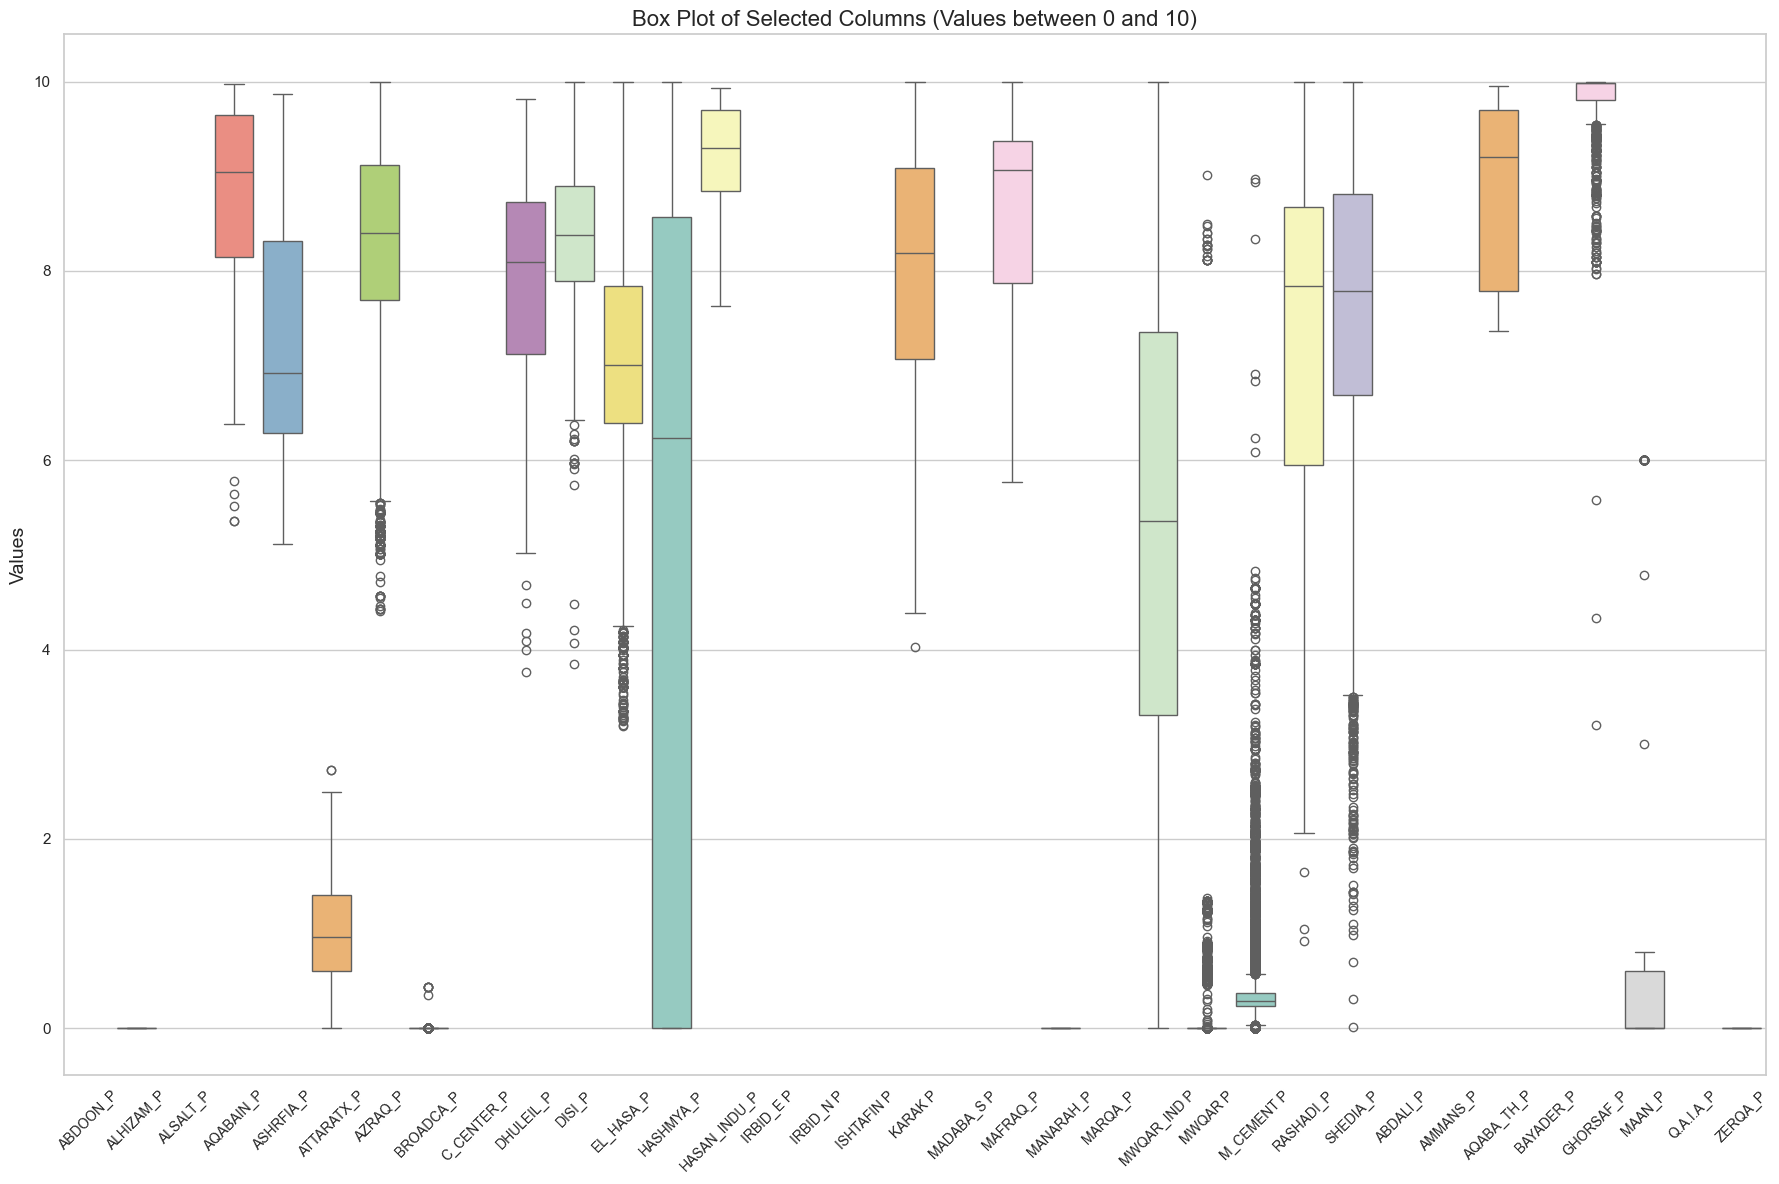

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path for the consumption data
consumption_file_path = "/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"

# Read the consumption data from the Excel file into a DataFrame
consumption_df = pd.read_excel(consumption_file_path)

# Drop any columns that are completely empty
consumption_df = consumption_df.dropna(axis=1, how='all')

# Define the columns to analyze
columns_to_plot = [
    'ABDOON_P', 'ALHIZAM_P', 'ALSALT_P', 'AQABAIN_P', 'ASHRFIA_P',
    'ATTARATX_P', 'AZRAQ_P', 'BROADCA_P', 'C_CENTER_P', 'DHULEIL_P',
    'DISI_P', 'EL_HASA_P', 'HASHMYA_P', 'HASAN_INDU_P', 'IRBID_E P',
    'IRBID_N P', 'ISHTAFIN P', 'KARAK P', 'MADABA_S P', 'MAFRAQ_P',
    'MANARAH_P', 'MARQA_P', 'MWQAR_IND P', 'MWQAR P', 'M_CEMENT P',
    'RASHADI_P', 'SHEDIA_P', 'ABDALI_P', 'AMMANS_P', 'AQABA_TH_P',
    'BAYADER_P', 'GHORSAF_P', 'MAAN_P', 'Q.A.I.A_P', 'ZERQA_P'
]

# Filter the DataFrame to keep only the columns that exist in the dataset
existing_columns = [col for col in columns_to_plot if col in consumption_df.columns]

# Create a new DataFrame with only the selected columns
filtered_df = consumption_df[existing_columns].copy()

# Keep only values that are between 0 and 10
filtered_df = filtered_df[(filtered_df >= 0) & (filtered_df <= 10)]

# Create a figure for the box plot
plt.figure(figsize=(18, 12))  # Increase figure size for better visibility

# Create a box plot for all selected columns
sns.boxplot(data=filtered_df, palette="Set3")

# Set title and labels
plt.title('Box Plot of Selected Columns (Values between 0 and 10)', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and reduce font size

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


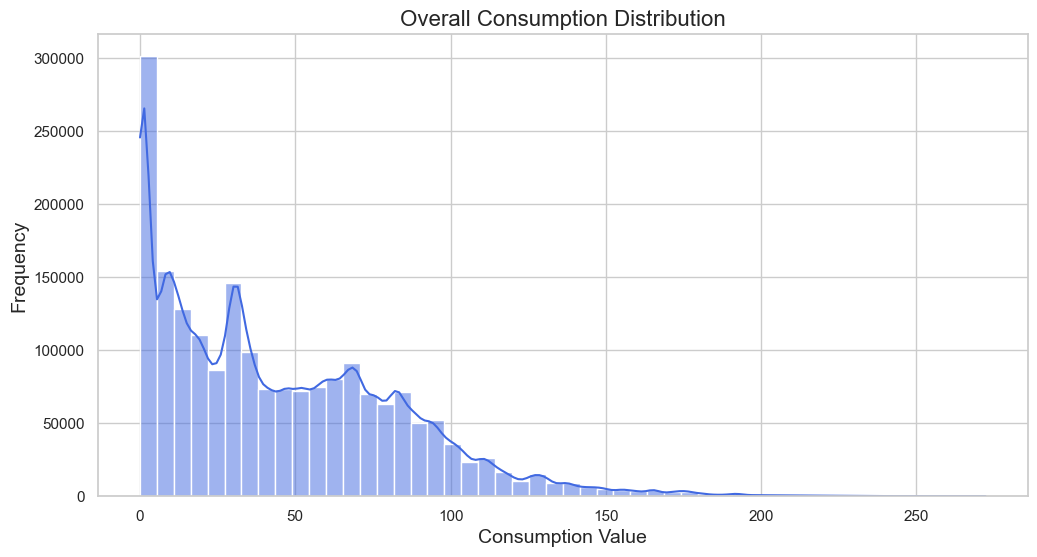

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
consumption_file_path = "/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"

# Read the Excel file
consumption_df = pd.read_excel(consumption_file_path)

# Drop completely empty columns
consumption_df = consumption_df.dropna(axis=1, how='all')

# Select only numerical columns (assuming consumption values are numeric)
numeric_columns = consumption_df.select_dtypes(include=['number']).columns

# Flatten all values from selected columns into one list (ignoring NaN values)
all_values = consumption_df[numeric_columns].values.flatten()
all_values = all_values[~pd.isna(all_values)]  # Remove NaNs

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(all_values, bins=50, kde=True, color='royalblue')

# Set titles and labels
plt.title("Overall Consumption Distribution", fontsize=16)
plt.xlabel("Consumption Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()


In [293]:
  import numpy as np
import pandas as pd

# Load your actual consumption data from the Excel file
file_path = "/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"
consumption_df = pd.read_excel(file_path)


# Update with the correct datetime column name
datetime_column_name = 'date time'  # Replace with the actual name
consumption_df.set_index(datetime_column_name, inplace=True)

# Ensure the consumption column is numeric
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
consumption_df[consumption_column_name] = pd.to_numeric(consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Parameters for additional simulated data
np.random.seed(42)
n_days = 365 * 2  # 2 years of data
n_intervals_per_day = 96  # 15-min intervals
n_samples = n_days * n_intervals_per_day

# Generate a datetime index for the additional data

date_rng = pd.date_range(start="2023-01-01", periods=n_samples, freq="15min")  # Change 'T' to 'min'

# Simulate daily and weekly patterns
daily_pattern = np.sin(2 * np.pi * (np.arange(n_intervals_per_day) / n_intervals_per_day)) * 20 + 50
weekly_pattern = (np.cos(2 * np.pi * (date_rng.dayofweek / 7)) * 10 + 40)

# Add noise and holiday effects
noise = np.random.normal(0, 2, n_samples)
holidays = np.random.choice([0, 20], size=n_samples, p=[0.95, 0.05])

# Repeat daily pattern for all days
daily_pattern_repeated = np.tile(daily_pattern, n_days)

# Simulate power consumption
power_consumption = (daily_pattern_repeated +
                     weekly_pattern[:n_samples] +
                     noise + holidays)

# Create a DataFrame for simulated data
simulated_data = pd.DataFrame({
    'datetime': date_rng,
    'power_consumption': power_consumption
})

# Combine with actual consumption data
combined_data = pd.concat([consumption_df[[consumption_column_name]], simulated_data.set_index('datetime')])

# Add time-based features to the combined DataFrame
combined_data['hour'] = combined_data.index.hour
combined_data['day_of_week'] = combined_data.index.dayofweek
combined_data['is_weekend'] = combined_data['day_of_week'].isin([5, 6]).astype(int)

# Assuming you have specific holidays to add (replace with actual holiday dates)
holidays = pd.to_datetime(['2022-12-25', '2023-01-01', '2023-04-15'])  # Example holiday dates
combined_data['is_holiday'] = combined_data.index.isin(holidays).astype(int)

# Display the first few rows of the combined DataFrame
# Keep only the specified columns
combined_data = combined_data[['power_consumption', 'hour', 'day_of_week', 'is_weekend', 'is_holiday']]

# Display the first few rows of the updated combined_data
print(combined_data['power_consumption'].head())



2022-12-22 00:00:00   NaN
2022-12-22 00:15:00   NaN
2022-12-22 00:30:00   NaN
2022-12-22 00:45:00   NaN
2022-12-22 01:00:00   NaN
Name: power_consumption, dtype: float64


In [294]:
import pandas as pd
import numpy as np

# Load your actual consumption data from the Excel file
file_path = "/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"
consumption_df = pd.read_excel(file_path)

# Set datetime as the index
consumption_df.set_index('date time', inplace=True)

# Ensure the consumption column is numeric
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
consumption_df[consumption_column_name] = pd.to_numeric(consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Create a DataFrame with your actual consumption data
data = consumption_df[[consumption_column_name]].copy()

# Add time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
#friday and saturday
data['is_weekend'] = data['day_of_week'].isin([4, 5]).astype(int)

# You can add holiday effects here if needed
# For example, you could define specific dates as holidays
# holidays = ['2023-01-01', '2023-12-25']  # Add your holiday dates here
# data['is_holiday'] = data.index.normalize().isin(pd.to_datetime(holidays)).astype(int)

# Display the first few rows of the DataFrame
print(data.head())
# Find the first holiday
# Filter for the specific date (December 23, 2022)
specific_date_data = data.loc['2022-12-23']

# Display the raw data for December 23, 2022
print("Raw data for December 23, 2022:")
print(specific_date_data)



                      ABDOON_P  hour  day_of_week  is_weekend
date time                                                    
2022-12-22 00:00:00  68.764967     0            3           0
2022-12-22 00:15:00  66.653231     0            3           0
2022-12-22 00:30:00  64.597852     0            3           0
2022-12-22 00:45:00  62.472460     0            3           0
2022-12-22 01:00:00  60.585692     1            3           0
Raw data for December 23, 2022:
                      ABDOON_P  hour  day_of_week  is_weekend
date time                                                    
2022-12-23 00:00:00  71.624131     0            4           1
2022-12-23 00:15:00  69.574643     0            4           1
2022-12-23 00:30:00  67.981991     0            4           1
2022-12-23 00:45:00  66.431842     0            4           1
2022-12-23 01:00:00  64.884872     1            4           1
...                        ...   ...          ...         ...
2022-12-23 22:45:00  81.221010    22  

In [295]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Scaling the target variable
scaler = MinMaxScaler()
data['power_consumption_scaled'] = scaler.fit_transform(data[['power_consumption']])

def create_sequences_seq2seq(data, target_column, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length):
        X.append(data.iloc[i:i + input_length][target_column].values)
        y.append(data.iloc[i + input_length:i + input_length + output_length][target_column].values)
    return np.array(X), np.array(y)

input_length = 48  # 12 hours (12*60/15)
output_length = 672  # 7 days

X, y = create_sequences_seq2seq(data, 'power_consumption_scaled', input_length, output_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, {y_test.shape}")

KeyError: "None of [Index(['power_consumption'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Load your consumption data from the Excel file
file_path ="/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"
consumption_df = pd.read_excel(file_path)


# Set datetime as the index
consumption_df.set_index('date time', inplace=True)

# Ensure the consumption column is numeric (replace 'your_consumption_column' with the actual column name)
# Check for the actual column names to replace correctly
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
consumption_df[consumption_column_name] = pd.to_numeric(consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Resample data to daily frequency and sum consumption
daily_consumption = consumption_df.resample('D')[consumption_column_name].sum()

# Plot daily consumption
plt.figure(figsize=(14, 7))
plt.plot(daily_consumption.index, daily_consumption, label='Daily Consumption')
plt.title('Daily Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid()
plt.show()

# Time series decomposition
decomposition = seasonal_decompose(daily_consumption, model='additive')
decomposition.plot()
plt.show()

# Autocorrelation plot
autocorrelation_plot(daily_consumption)
plt.title('Autocorrelation of Daily Consumption')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your consumption data from the Excel file
file_path ="/Users/computer/Downloads/Load/Load/data/consumption_data/SUB_LOAD_15MIN - 2023.xlsx"
consumption_df = pd.read_excel(file_path)

# Set datetime as the index
consumption_df.set_index('date time', inplace=True)

# Ensure the consumption column is numeric
consumption_column_name = 'ABDOON_P'  # Update this with the correct name
consumption_df[consumption_column_name] = pd.to_numeric(consumption_df[consumption_column_name], errors='coerce')

# Remove any rows with NaN values in the consumption column
consumption_df.dropna(subset=[consumption_column_name], inplace=True)

# Resample data to daily frequency and sum consumption
daily_consumption = consumption_df.resample('D')[consumption_column_name].sum()

# ACF and PACF plots
plot_acf(daily_consumption)
plt.title('ACF of Daily Consumption')
plt.show()

plot_pacf(daily_consumption)
plt.title('PACF of Daily Consumption')
plt.show()

# Set the parameters p, d, q based on ACF and PACF analysis
p = 1  # replace with your chosen value
d = 1  # replace with your chosen value
q = 1  # replace with your chosen value

# Fit the ARIMA model
model = ARIMA(daily_consumption, order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=daily_consumption.index[-1] + pd.Timedelta(days=1), periods=30)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the forecast along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(daily_consumption, label='Historical Consumption')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Daily Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_consumption)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
import pmdarima
print(pmdarima.__version__)

In [ ]:
from pmdarima import auto_arima

model = auto_arima(daily_consumption, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())


In [ ]:
import pandas as pd
from pmdarima import auto_arima

# Load your consumption data (make sure your DataFrame is prepared)
file_path = r"C:\Users\pc\Downloads\Load\Load\data\consumption_data\SUB_LOAD_15MIN - 2023.xlsx"
consumption_df = pd.read_excel(file_path)
consumption_df.set_index('date time', inplace=True)
consumption_column_name = 'ABDOON_P'  
consumption_df[consumption_column_name] = pd.to_numeric(consumption_df[consumption_column_name], errors='coerce')
consumption_df.dropna(subset=[consumption_column_name], inplace=True)
daily_consumption = consumption_df.resample('D')[consumption_column_name].sum()

# Automatically fit an ARIMA model
model = auto_arima(daily_consumption, seasonal=False, stepwise=True, suppress_warnings=True)

# Print the summary of the model
print(model.summary())


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data
train_size = int(len(daily_consumption) * 0.8)
train, test = daily_consumption[:train_size], daily_consumption[train_size:]

# Fit the model on training data
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Make predictions on the test set
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error: {rmse}')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'daily_consumption' is already defined and the SARIMAX model has been fitted

# Set the parameters for the forecast
n_days = 7
n_intervals_per_day = 96  # 24 hours * 4 (15-minute intervals)
total_intervals = n_days * n_intervals_per_day

# Generate future time index for the next 7 days with 15-minute frequency
last_date = daily_consumption.index[-1]  # Get the last date from historical data
future_index = pd.date_range(start=last_date + pd.Timedelta(minutes=15), periods=total_intervals, freq='15min')  # Updated 'T' to 'min'

# Forecast the future values
forecast = model_fit.get_forecast(steps=total_intervals)
forecast_values = forecast.predicted_mean  # Predicted mean values

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame(forecast_values, index=future_index, columns=['Forecast'])

# Display the forecast DataFrame
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(daily_consumption, label='Historical Consumption', color='blue')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('15-Minute Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid()
plt.show()


# Combined Dataset EDA